## Анализ результата работы навигатора

In [191]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [211]:

engine = create_engine('postgresql://postgres@localhost:5432/lba')
df = pd.read_sql_query('select * from route_info',con=engine)
# df = df.rename({'shortpath':'shortest',
#                 'walk_lvl':'walk_yan_responders',
#                 'walk_lvl_rf':'walk_yan',
#                 'walk_weight':'walk_weighted_responders',
#                 'walk_weight_rf':'walk_weighted'})
df = df[df.mean_cost>0]


In [198]:
grouped = df.groupby('algorithm')
# labels = ['shortest','walk_yan_responders','walk_yan','walk_weighted_responders','walk_weighted']
fig, ax = plt.subplots(figsize=(20,6))
for alg, group in grouped:
    group.plot(ax=ax, x="nodes",y="mean_cost",label=alg)

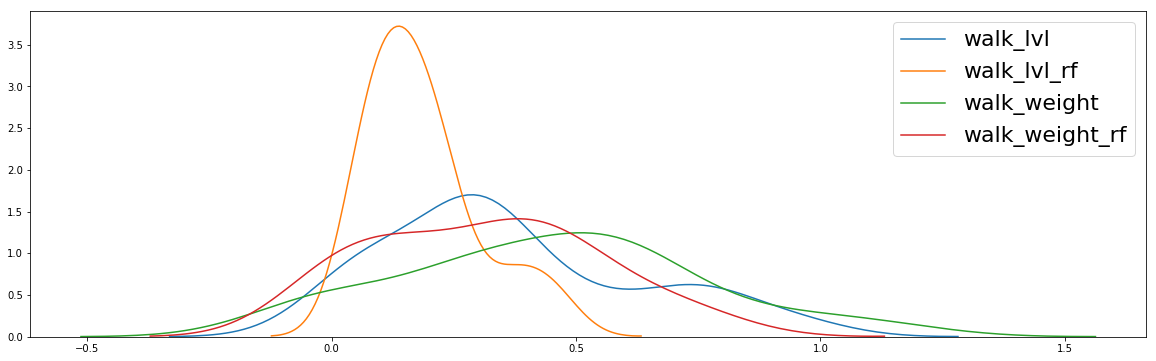

In [189]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,6))

algs = df[df.algorithm!='shortpath']
shortest_scores = list(df[df.algorithm == 'shortpath']['mean_cost'])
stats = {}
for alg, group in algs.groupby('algorithm'):
    
    l = [shortest_scores[i] - v for i, v in enumerate(list(group.mean_cost))]
    stats[alg] = {}
    stats[alg]['mean_diff'] = np.mean(l)
    stats[alg]['median_diff'] = np.median(l)
    stats[alg]['max_diff'] = np.max(l)
    stats[alg]['min_diff'] = np.min(l)
    sns.distplot(l, ax=ax, kde=True, hist=False, label='%s'%alg)
plt.legend(fontsize=22)
plt.show()

In [168]:
stats

{'walk_lvl': {'max_diff': 0.9600000000000002,
  'mean_diff': 0.36719999999999997,
  'median_diff': 0.30999999999999983,
  'min_diff': -0.010000000000000231},
 'walk_lvl_rf': {'max_diff': 0.45999999999999996,
  'mean_diff': 0.18599999999999997,
  'median_diff': 0.15999999999999992,
  'min_diff': 0.04999999999999982},
 'walk_weight': {'max_diff': 1.1300000000000001,
  'mean_diff': 0.44799999999999995,
  'median_diff': 0.4900000000000002,
  'min_diff': -0.07999999999999985},
 'walk_weight_rf': {'max_diff': 0.7600000000000002,
  'mean_diff': 0.3104,
  'median_diff': 0.34999999999999964,
  'min_diff': 0.0}}

In [214]:
winners = {
    'shortpath':0,
    'walk_lvl':0,
    'walk_lvl_rf':0,
    'walk_weight':0,
    'walk_weight_rf':0
}
for exp, gr in df.groupby('nodes'):
    exp_winners = gr[gr.mean_cost == gr.mean_cost.min()]['algorithm'].values
    # print (exp_winners)
    for win in exp_winners:
        winners[win]+=1
    # winners[]+=1
total = df.nodes.unique().__len__()
# print(total)
for key, value in winners.items():
    print ('%s: %s' % (key, value / total * 100))

shortpath: 0.0
walk_lvl: 36.0
walk_lvl_rf: 16.0
walk_weight: 44.0
walk_weight_rf: 20.0


In [166]:
#diff_rf = (df.cost_short.sum() - df.cost_rf.sum())/df.cost_short.sum() * 100
#diff_all = (df.cost_short.sum() - df.cost_walk.sum())/df.cost_short.sum() * 100
#print("cost_rf profit: %s"%diff_rf)
#print("cost profit: %s"%diff_all)
round((sum(shortest_scores) - df.groupby('algorithm')['mean_cost'].sum())/sum(shortest_scores), 3)

algorithm
shortpath         0.000
walk_lvl          0.168
walk_lvl_rf       0.085
walk_weight       0.205
walk_weight_rf    0.142
Name: mean_cost, dtype: float64

In [105]:
(df.groupby('algorithm')['total_time'].sum() - 1199) / 1199

algorithm
shortpath         0.000000
walk_lvl          0.220183
walk_lvl_rf       0.188490
walk_weight       0.065888
walk_weight_rf    0.064220
Name: total_time, dtype: float64

In [14]:
df.cost_short.mean(), df.cost_rf.mean(), df.cost_walk.mean()

(2.2479999999999998, 2.091333333333333, 2.054333333333333)

In [16]:
(df.cost_short.mean() - df.cost_rf.mean()) /df.cost_short.mean()

0.06969157769869518

In [17]:
(df.cost_short.mean() - df.cost_walk.mean()) /df.cost_short.mean()

0.08615065243179122

In [71]:
df = pd.read_csv('data/paths_info.csv')
print(df)

   Unnamed: 0    id  total_lvl  total_lvl_rf  total_length
0           0   1.0        NaN      1.655629   5066.900128
1           1   3.0        NaN      1.653595   5104.130076
2           2   4.0        NaN      1.558442   5053.848033
3           3   9.0        NaN      1.554839   5054.145770
4           4  15.0        NaN      1.551282   5055.963198
5           5  25.0        NaN      1.535032   5093.126326
6           6  39.0        NaN      1.500000   5217.526421


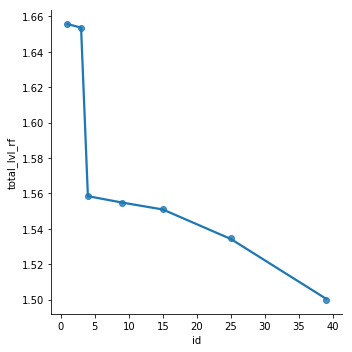

In [74]:

# df1 = df.sort_values(by='total_lvl_rf')
df['ix'] = list(range(0, df.__len__()))
# df1.head(30)
sns.lmplot('id','total_lvl_rf',df,lowess=True)
# sns.regplot('id','total_lvl_rf',df, x_estimator=np.mean,logx=True, truncate=True)